<a href="https://colab.research.google.com/github/priyam3198/football-analytics/blob/main/Pass_Network_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This is a basic pass network example taken from mckayjohns tutorial

In [1]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [3]:
df = pd.read_csv('valladolidA.csv')

In [4]:
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [5]:
df = df[df['teamId'] == 'Barcelona']

In [6]:
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8


In [7]:
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1) #shift will move up the playerid

passes = df[df['type'] == 'Pass']
successful = passes[passes['outcome'] == 'Successful']

In [8]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [9]:
successful['passer'] = pd.to_numeric(successful['passer'],downcast = 'integer')
successful['recipient'] = pd.to_numeric(successful['recipient'],downcast = 'integer')

<ipython-input-9-a3b92d1f4bee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = pd.to_numeric(successful['passer'],downcast = 'integer')
<ipython-input-9-a3b92d1f4bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = pd.to_numeric(successful['recipient'],downcast = 'integer')


In [10]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8,10
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10,14
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14,44721
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721,2


In [11]:
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [12]:
average_locations

,x,y,count
passer,,,
1,7.288235,48.794118,34
2,66.277273,12.131818,44
4,32.895833,43.518750,48
8,50.547170,43.944340,106
9,73.242857,55.414286,7
10,62.553247,45.253247,77
14,59.244444,63.655556,9
15,37.221127,74.295775,71
16,68.410526,68.071053,38


In [21]:
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

In [16]:
pass_between

,passer,recipient,pass_count
0,1,2,3
1,1,4,3
2,1,8,5
3,1,9,1
4,1,15,6
...,...,...,...
123,89931,44721,2
124,351252,8,2
125,351252,10,3
126,351252,15,5


In [22]:
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [25]:
pass_between = pass_between[pass_between['pass_count']>5]

In [26]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
29,8,2,8,50.547170,43.944340,106,66.277273,12.131818,44
46,10,2,6,62.553247,45.253247,77,66.277273,12.131818,44
102,28,2,11,47.251724,17.100000,58,66.277273,12.131818,44
30,8,4,8,50.547170,43.944340,106,32.895833,43.518750,48
64,15,4,9,37.221127,74.295775,71,32.895833,43.518750,48
103,28,4,13,47.251724,17.100000,58,32.895833,43.518750,48
12,2,8,12,66.277273,12.131818,44,50.547170,43.944340,106
22,4,8,6,32.895833,43.518750,48,50.547170,43.944340,106
48,10,8,19,62.553247,45.253247,77,50.547170,43.944340,106
65,15,8,7,37.221127,74.295775,71,50.547170,43.944340,106


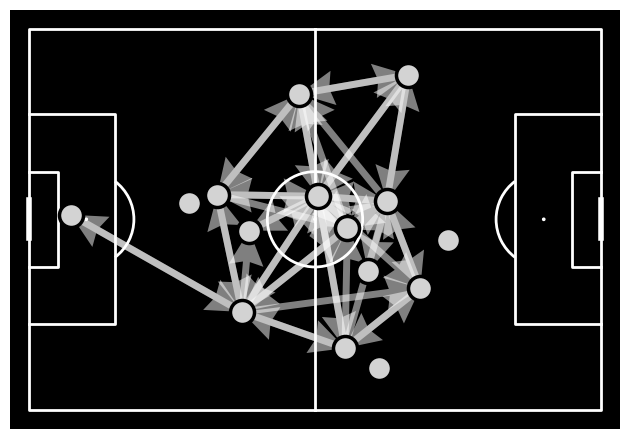

In [32]:
pitch = pitch = Pitch(pitch_type='statsbomb', half=False, pitch_color='black', line_color='white', line_alpha=1, linewidth=2,
                      linestyle=None, line_zorder=0.9, spot_scale=0.002, stripe=False, stripe_color='#c2d59d', stripe_zorder=0.6,
                      pad_left=None, pad_right=None, pad_bottom=None, pad_top=None, positional=False, positional_zorder=0.8,
                      positional_linewidth=None, positional_linestyle=None, positional_color='#eadddd', positional_alpha=1,
                      shade_middle=False, shade_color='#f2f2f2', shade_alpha=1, shade_zorder=0.7, pitch_length=None,
                      pitch_width=None, goal_type='line', goal_alpha=1, goal_linestyle=None,
                      axis=False, label=False, tick=False, corner_arcs=False)
fig, ax = pitch.draw()

#plot the arrows

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 5, headwidth = 5, color = 'w', ax = ax, zorder = 1, alpha = .5)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)